In [150]:
# Applied Machine Learning (HOUSECS 59-03) Final Project
# James Rumsey and Tanisha Nalavadi

In [171]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [172]:
df = pd.read_csv("data/breast-cancer-wisconsin.csv")

Our goal is to predict if tumors are malignant or benign based on ten real-valued features from images of cell nuclei.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. (Source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

Attribute Information:

1) ID number 

2) Diagnosis (M = malignant, B = benign) 


Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values) 

c) perimeter 

d) area

e) smoothness (local variation in radius lengths) 

f) compactness (perimeter^2 / area - 1.0) 

g) concavity (severity of concave portions of the contour) 

h) concave points (number of concave portions of the contour) 

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [173]:
print("\n \t Data frame has {0[0]} rows and {0[1]} columns: \n".format(df.shape))
df.info()
df.head()



 	 Data frame has 569 rows and 33 columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-n

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 1. Visualizing Data

Below are scatterplots that show correlation between each pair of features (the mean for each was used). In each of the scatterplots, we see that there are two relatively distinct groupings, representing malignant tumors (red) and benign tumors (blue). Across the diagnoal, there are histograms that show the distribution of each feature in the dataset.

C:\Users\jprum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """


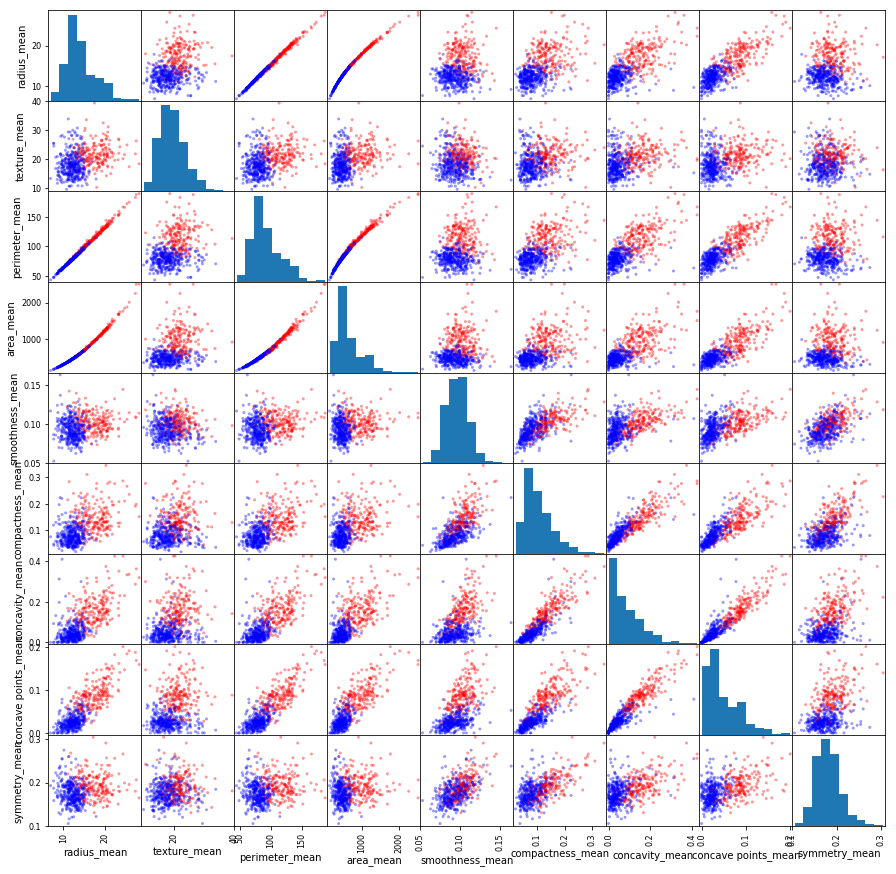

In [191]:
features_mean = list(df.columns[2:11]) #means are in columns 1-11
color_dic = {'M':'red', 'B':'blue'}
colors = df['diagnosis'].map(lambda x: color_dic.get(x))

sm = pd.scatter_matrix(df[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

# 2. Classification
We are dealing with a classification problem: our goal is to predict whether tumors will be malignant (M) or benign (B). The two classifications tested are Naive Bayes and Support Vector Machines.

For both classifiers, we initialize the classifier, train it with X_train and y_train, predict using X_test, and measure accuracy of predictions. We also use a cross-validation score to estimate accuracy.


In [182]:

#X-values are the features, y-value is the diagnosis
X = df.loc[:,features_mean]
y = df.loc[:, 'diagnosis']
#Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2.1 Naive Bayes
Naive Bayes classifiers apply Bayes' Theorem with the "naive" assumption that there is independence between all features.

In [193]:
clf = GaussianNB()
clf.fit(X_train, y_train)
nb_prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y)
acc_nb = accuracy_score(nb_prediction, y_test)

print("Accuracy: {0:.2%}".format(acc_nb))
print("Cross validation score: {0:.2%} ".format(np.mean(scores)))

Accuracy: 91.23%
Cross validation score: 91.39% 


## 2.2 Support Vector Machines
Support vector machines are another classification algorithm. Given a set of training examples, an SVM assigns examples to one category. SVMs are a linear classifier, as opposed to a probabilistic classifer like Naive Bayes. Kernels map inputs into higher dimensional spaces. Here, the RBF and linear kernels are used.

In [204]:
from sklearn.svm import SVC, LinearSVC

# Support Vector Classification: RBF
clf = SVC() #Uses a standard rbf kernel
clf.fit(X_train, y_train)
svm_prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y)
acc_svm = accuracy_score(svm_prediction, y_test)

print("Accuracy for SVC with RBF kernel: {0:.2%}".format(acc_svm))
print("Cross validation score: {0:.2%} ".format(np.mean(scores)))

# Support Vector Classification: Linear
clf = LinearSVC() #Uses a linear kernel
clf.fit(X_train, y_train)
svm_prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y)
acc_svm = accuracy_score(svm_prediction, y_test)

print("Accuracy for SVC with linear kernel: {0:.2%}".format(acc_svm))
print("Cross validation score: {0:.2%} ".format(np.mean(scores)))



Accuracy for SVC with RBF kernel: 70.18%
Cross validation score: 68.54% 
Accuracy for SVC with linear kernel: 81.58%
Cross validation score: 86.12% 
